In [1]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [50]:
# 生成三个数据集
x1 = np.random.normal(50, 6, 200)
y1 = np.random.normal(5, 0.5, 200)

x2 = np.random.normal(30,6,200)
y2 = np.random.normal(4,0.5,200)

x3 = np.random.normal(45,6,200)
y3 = np.random.normal(2.5, 0.5, 200)

(200,)


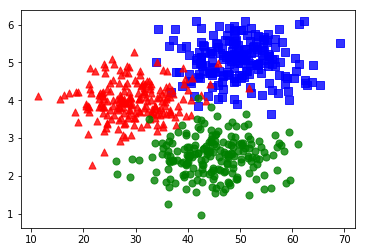

In [5]:
# 画出三个数据集的散点图
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)

In [51]:
# 把x1,x2,x3拼接成一个(600,)的list
x_val = np.concatenate((x1,x2,x3))
y_val = np.concatenate((y1,y2,y3))

In [7]:
# 计算x1,x2,x3中的最大值和最小值之间的差值。用于归一化处理
x_diff = max(x_val)-min(x_val)
y_diff = max(y_val)-min(y_val)

In [52]:
# 分别对x1,x2,x3进行归一化处理
x_normalized = [x/(x_diff) for x in x_val]
y_normalized = [y/(y_diff) for y in y_val]
# 生成对应矩阵（即坐标轴上的点坐标）
xy_normalized = zip(x_normalized,y_normalized)

In [9]:
# 对（x1,y1），（x2,y2），（x3,y3）赋予标签1,2,3。---分类标签
labels = [1]*200+[2]*200+[3]*200

In [11]:
# 选取问题点最近的多少个最近邻，其他的参数选择默认
clf = neighbors.KNeighborsClassifier(30)

In [22]:
# 结合数据进行拟合。（需要区分python2与python3）
clf.fit([i for i in xy_normalized], labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [53]:
# 计算（50,5）和（30,3）附近最近的5个点的位置
nearests = clf.kneighbors([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)], 5, False)

In [54]:
# 把距离最近的点的索引打出来
nearests

array([[161,  11, 152,  42,  16],
       [326, 371, 386, 237, 215]], dtype=int64)

In [25]:
# 预测这两个点是属于哪一个分类的
prediction = clf.predict([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction

array([1, 2])

In [56]:
# 计算出这两个点所在类中的占比
prediction_proba = clf.predict_proba([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction_proba

array([[1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333]])

#### 对上述的kNN分类计算的结果进行正确率的打分

In [65]:
# 生成测试数据
x1_test = np.random.normal(50, 6, 100)
y1_test = np.random.normal(5, 0.5, 100)

x2_test = np.random.normal(30,6,100)
y2_test = np.random.normal(4,0.5,100)

x3_test = np.random.normal(45,6,100)
y3_test = np.random.normal(2.5, 0.5, 100)

# 进行归一化处理
xy_test_normalized = zip(np.concatenate((x1_test,x2_test,x3_test))/x_diff,
                        np.concatenate((y1_test,y2_test,y3_test))/y_diff)

# 分类标签
labels_test = [1]*100+[2]*100+[3]*100

In [66]:
# 计算出正确率的评分
score = clf.score([i for i in xy_test_normalized], labels_test)
score

0.9766666666666667

#### 生成图片

In [32]:
# x轴是在1-70,以内，y轴是在1-7内
xx,yy = np.meshgrid(np.arange(1,70.1,0.1), np.arange(1,7.01,0.01))

In [33]:
# 归一化处理
xx_normalized = xx/x_diff
yy_normalized = yy/y_diff

In [34]:
# 生成对应的点坐标
coords = np.c_[xx_normalized.ravel(), yy_normalized.ravel()]

In [35]:
Z = clf.predict(coords)

In [36]:
Z = Z.reshape(xx.shape)

(10, 70, 1, 7)

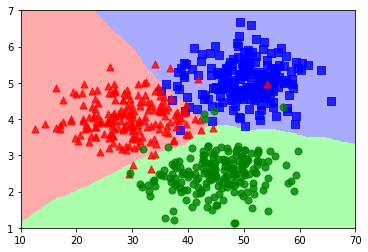

In [67]:
# 生成图片
light_rgb = ListedColormap([ '#AAAAFF', '#FFAAAA','#AAFFAA'])
plt.pcolormesh(xx, yy,Z, cmap=light_rgb)
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)
plt.axis((10, 70,1,7))

#### 生成概率预测图

In [38]:
Z_proba = clf.predict_proba(coords)

In [39]:
Z_proba_reds = Z_proba[:,1].reshape(xx.shape)

(10, 70, 1, 7)

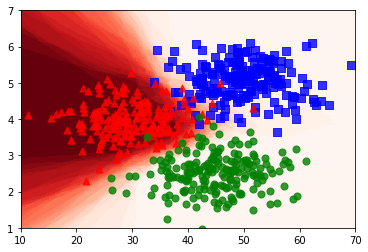

In [40]:
plt.pcolormesh(xx, yy,Z_proba_reds, cmap='Reds')
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)
plt.axis((10, 70,1,7))